In [ ]:
import numpy as np
import pandas as pd

### Importing Libraries

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [2]:
data = pd.read_csv("/content/marketing_campaign.csv",sep="\t")

#get the number of rows and columns
print(f"The number of rows : {data.shape[0]} and the number of columns : {data.shape[1]}")

pd.set_option("display.max_columns",None)

data.head()

The number of rows : 2240 and the number of columns : 29


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
#info on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Data Cleaning

In [4]:
data_cleaned = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data_cleaned))

The total number of data-points after removing the rows with missing values are: 2216


### Exploring the categorical features

In [5]:
print("Total categories in the feature Marital_Status:\n", data_cleaned["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data_cleaned["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


### Dealing with outliers

In [6]:
data_cleaned.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
data_cleaned = data_cleaned[(data_cleaned["Income"] < 600000)]
print("The total number of data-points after removing the outliers are:", len(data_cleaned))

The total number of data-points after removing the outliers are: 2215


In [8]:
# Keep only rows where 'Year_Birth' is 1940 or later
data_cleaned = data_cleaned[data_cleaned['Year_Birth'] >= 1940]

print("The total number of data-points after removing the outliers are:", len(data_cleaned))

The total number of data-points after removing the outliers are: 2212


### Feature Engineering

In [9]:
# Calculate the age
data_cleaned['Age'] = 2021 - data_cleaned['Year_Birth']

#Total spendings on various items
data_cleaned["Spent"] = data_cleaned["MntWines"]+ data_cleaned["MntFruits"]+ data_cleaned["MntMeatProducts"]+ data_cleaned["MntFishProducts"]+ data_cleaned["MntSweetProducts"]+ data_cleaned["MntGoldProds"]

#Deriving living situation by marital status
data_cleaned["Living_With"] = data_cleaned["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

data_cleaned["Living_With"] = data_cleaned["Living_With"].replace({"Alone": 1, "Partner":2})
#Feature indicating total children living in the household
data_cleaned["Children"]=data_cleaned["Kidhome"]+data_cleaned["Teenhome"]

#Feature for total members in the householde
data_cleaned["Family_Size"] = data_cleaned["Living_With"] + data_cleaned["Children"]

#Segmenting education levels in three groups
data_cleaned["Education"]=data_cleaned["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data_cleaned=data_cleaned.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID", "Year_Birth"]
data_cleaned = data_cleaned.drop(to_drop, axis=1)

In [10]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

In [11]:
data_cleaned[['Age','Living_With', 'Children', 'Family_Size', 'Income', 'Spent', 'Complain']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2212.0,52.086347,11.701599,25.0,44.0,51.0,62.0,81.0
Living_With,2212.0,1.645570,0.478449,1.0,1.0,2.0,2.0,2.0
Children,2212.0,0.947559,0.749466,0.0,0.0,1.0,1.0,3.0
Family_Size,2212.0,2.593128,0.906236,1.0,2.0,3.0,3.0,5.0
Income,2212.0,51958.810579,21527.278844,1730.0,35233.5,51371.0,68487.0,162397.0
Spent,2212.0,607.268083,602.513364,5.0,69.0,397.0,1048.0,2525.0
Complain,2212.0,0.009042,0.094678,0.0,0.0,0.0,0.0,1.0


### EDA

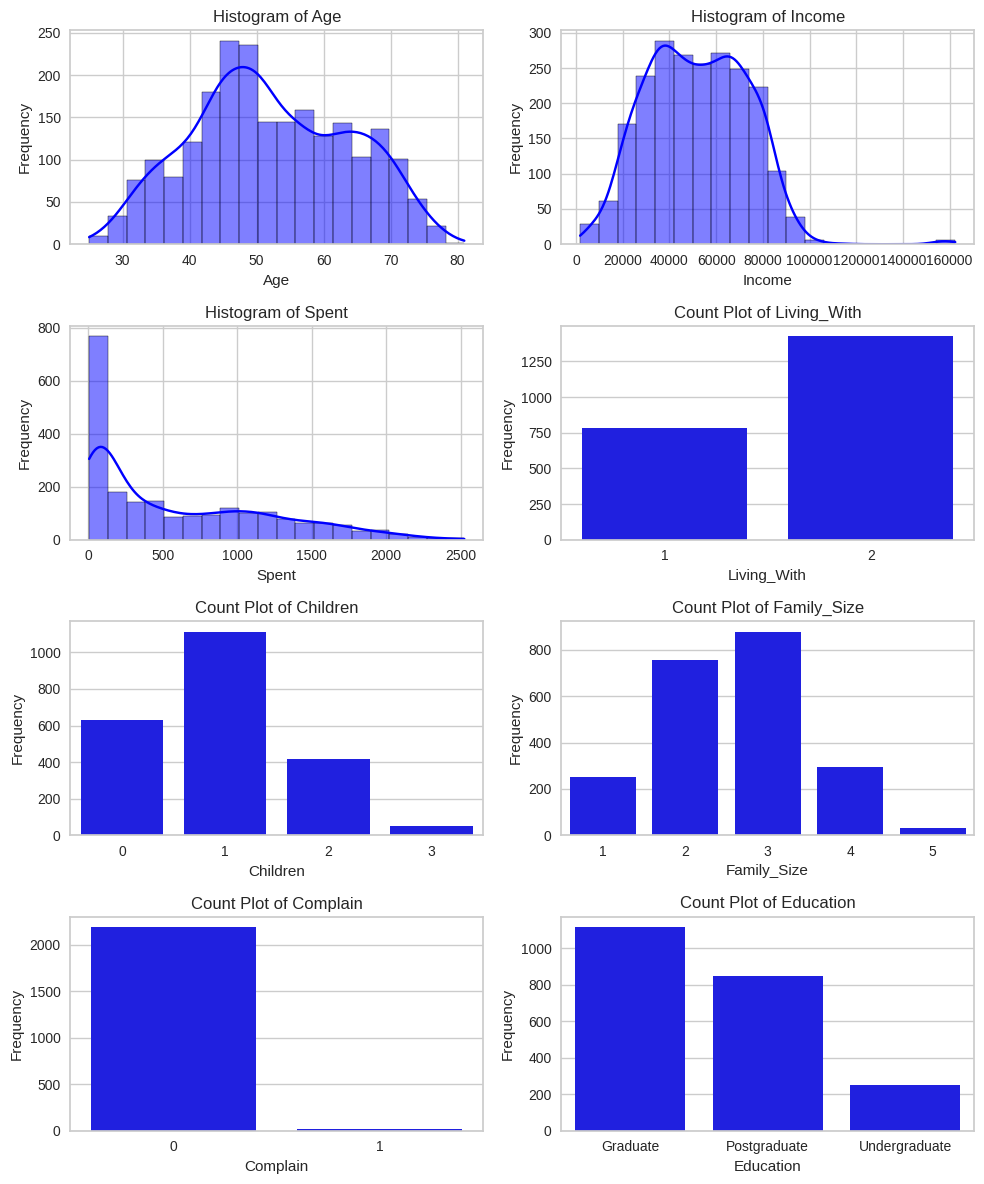

In [12]:
continuous_columns = ['Age', 'Income', 'Spent']
categorical_columns = ['Living_With', 'Children', 'Family_Size', 'Complain', 'Education']
all_columns = continuous_columns + categorical_columns

# Calculate the number of rows needed for two columns
num_rows = (len(all_columns) + 1) // 2

# Setup the matplotlib figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, num_rows * 3))
axes = axes.flatten()  # Flatten the axes array to make indexing easier

# Iterate over the columns and create appropriate plots
for i, col in enumerate(all_columns):
    if col in continuous_columns:
        sns.histplot(data=data_cleaned, x=col, bins=20, ax=axes[i], kde=True, color='blue')  # Add density curve for continuous data
        axes[i].set_title(f'Histogram of {col}')
    elif col in categorical_columns:
        sns.countplot(data=data_cleaned, x=col, ax=axes[i], color='blue')
        axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# If the number of columns is odd, hide the last subplot (if unused)
if len(all_columns) % 2 != 0:
    axes[-1].set_visible(False)  # Hide the last axis if not needed

# Adjust layout
plt.tight_layout()
plt.show()

### Bivariate Analysis (features correlation)

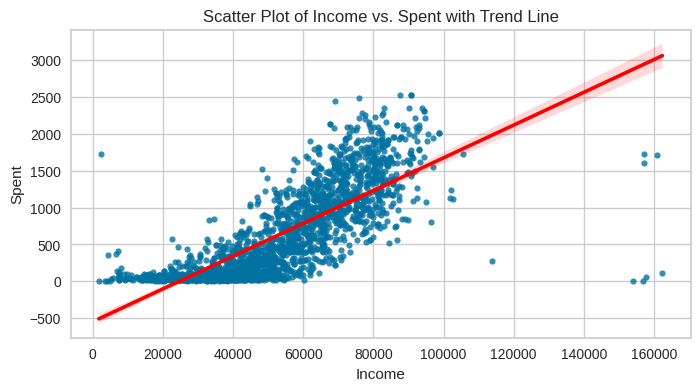

In [13]:
# Create the scatter plot with a regression line
plt.figure(figsize=(8, 4))
sns.regplot(x='Income', y='Spent', data=data_cleaned, scatter_kws={'s': 20}, line_kws={'color': 'red'})

plt.title('Scatter Plot of Income vs. Spent with Trend Line')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

### Average Spent x Age groups

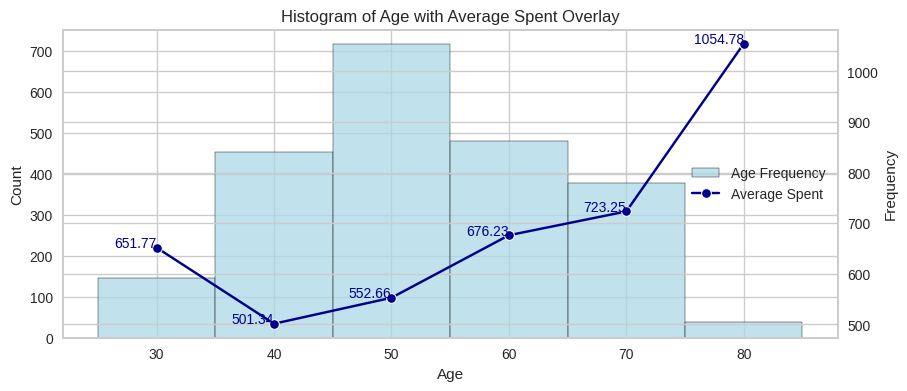

In [14]:
# Create bins for the 'Age' column
bins = np.arange(data_cleaned['Age'].min(), data_cleaned['Age'].max() + 10, 10)  # Adjust the bin width as necessary
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers

data_cleaned['Age_bins'] = pd.cut(data_cleaned['Age'], bins=bins, include_lowest=True)

# Group by the bins and calculate the mean of 'Spent'
grouped = data_cleaned.groupby(pd.cut(data_cleaned['Age'], bins=bins, labels=bin_centers))['Spent'].mean().reset_index()
grouped.columns = ['Age_bins', 'Spent']

# Plotting
plt.figure(figsize=(10, 4))
sns.histplot(data=data_cleaned, x='Age', bins=bins, color='lightblue', kde=False, stat='count', label='Age Frequency')

# Create a secondary y-axis for the line plot
ax2 = plt.twinx()
lineplot = sns.lineplot(data=grouped, x='Age_bins', y='Spent', ax=ax2, color='darkblue', marker='o', label='Average Spent')

# Setting labels and title
plt.title('Histogram of Age with Average Spent Overlay')
plt.xlabel('Age')
ax2.set_ylabel('Average Spent')
plt.ylabel('Frequency')

# Adding text labels at each point
for x, y in zip(grouped['Age_bins'], grouped['Spent']):
    ax2.text(x, y, f'{y:.2f}', color='darkblue', ha='right', size=10)

# Handling legends
handles, labels = [], []
for ax in plt.gcf().axes:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
plt.legend(handles, labels, loc='center right')

plt.show()

### Average Spent x Education and Family_Size

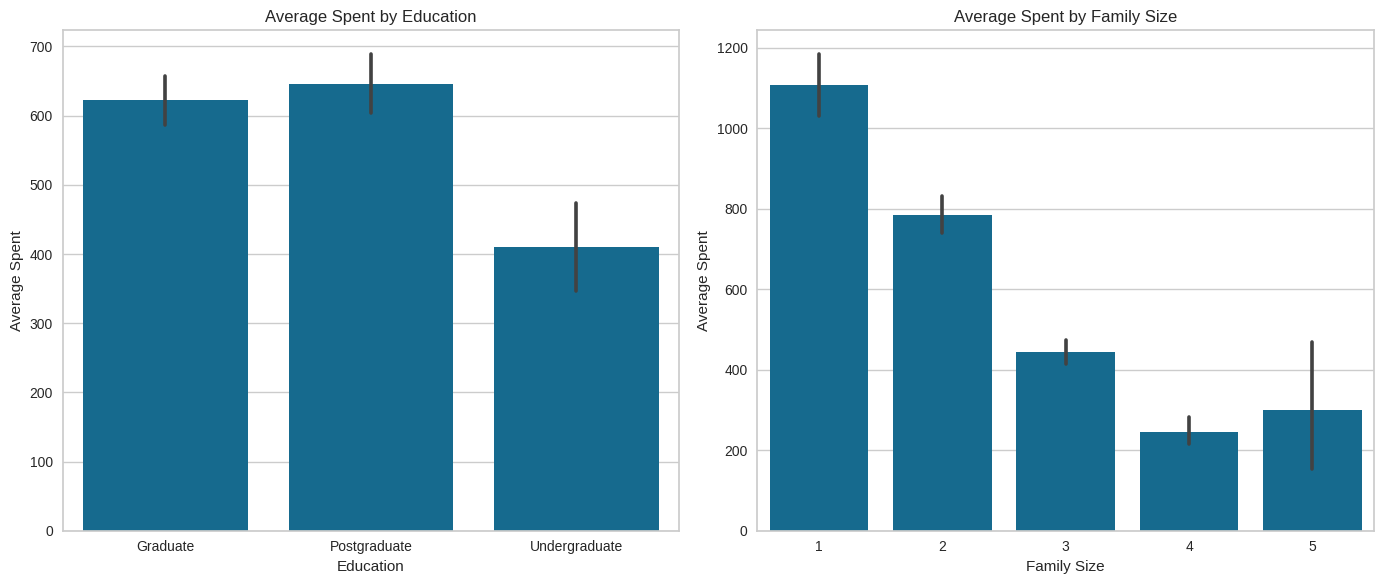

In [15]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# First subplot: Average "Spent" by "Education"
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(x='Education', y='Spent', data=data_cleaned)
plt.title('Average Spent by Education')
plt.xlabel('Education')
plt.ylabel('Average Spent')

# Second subplot: Average "Spent" by "Children"
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(x='Family_Size', y='Spent', data=data_cleaned)
plt.title('Average Spent by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Average Spent')

# Adjust layout
plt.tight_layout()

plt.show()

### Places of Purchase

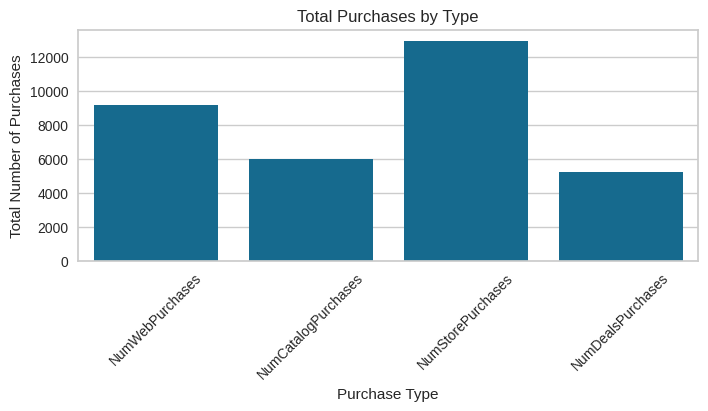

In [16]:
# Create a new dataframe that sums up each purchase type
totals = {
    'Purchase Type': ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'],
    'Total Purchases': [
        data['NumWebPurchases'].sum(),
        data['NumCatalogPurchases'].sum(),
        data['NumStorePurchases'].sum(),
        data['NumDealsPurchases'].sum()
    ]
}

df_totals = pd.DataFrame(totals)

# Create the bar chart
plt.figure(figsize=(8, 3))
sns.barplot(x='Purchase Type', y='Total Purchases', data=df_totals)
plt.title('Total Purchases by Type')

plt.ylabel('Total Number of Purchases')
plt.xticks(rotation=45)  # Rotates labels to avoid overlap
plt.show()

### Analyzing the Campaigns performance

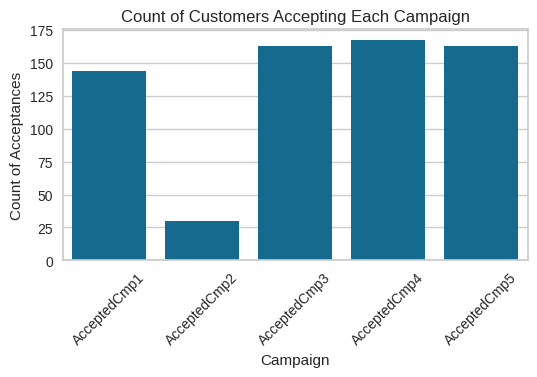

In [17]:
# Calculate the count of acceptances for each campaign
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
counts = data[campaigns].sum().reset_index()
counts.columns = ['Campaign', 'Count of Acceptances']

# Create the bar chart
plt.figure(figsize=(6, 3))
sns.barplot(x='Campaign', y='Count of Acceptances', data=counts)
plt.title('Count of Customers Accepting Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Count of Acceptances')
plt.xticks(rotation=45)
plt.show()

### Data Preprocessing

In [18]:
cat = (data_cleaned.dtypes == "object")

object_cols = list(cat[cat].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education']


In [19]:
# Creating a dictionary for manual label encoding
education_mapping = {
    "Undergraduate": 0,
    "Graduate": 1,
    "Postgraduate": 2
}

# Apply the mapping to the 'Education' column
data_cleaned['Education'] = data_cleaned['Education'].map(education_mapping)

In [20]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data_cleaned[i]=data_cleaned[[i]].apply(LE.fit_transform)

In [21]:
print(data_cleaned["Living_With"].value_counts())
print(data_cleaned["Education"].value_counts())

Living_With
2    1428
1     784
Name: count, dtype: int64
Education
1    1115
2     845
0     252
Name: count, dtype: int64


In [22]:
#Creating a copy of data
ds = data_cleaned.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response', 'Age_bins']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)
print("All features are now scaled")

All features are now scaled


In [23]:
scaled_ds.head(5)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size
0,-0.411675,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359
1,-0.411675,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070
2,-0.411675,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644
3,-0.411675,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.740959,0.069987,0.449070
4,1.123949,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.740959,0.069987,0.449070


In [24]:
pca = PCA(n_components=3)

pca.fit(scaled_ds)

# Transforming the Data and Creating a DataFrame:
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))

# Descriptive statistics
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-6.424437e-18,2.797451,-5.832779,-2.500727,-0.746865,2.399443,7.288413
col2,2212.0,2.569775e-17,1.637053,-3.997645,-1.318299,-0.093386,1.182080,6.421719
col3,2212.0,3.533440e-17,1.192433,-3.497851,-0.887713,-0.002837,0.820899,5.038207


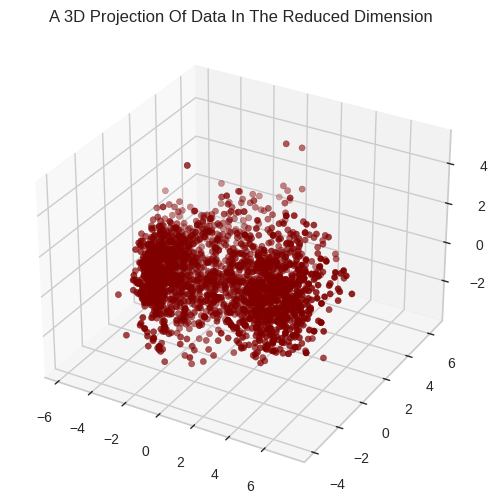

In [25]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### Clustering - Customer Segmentation

Elbow Method to determine the number of clusters to be formed:


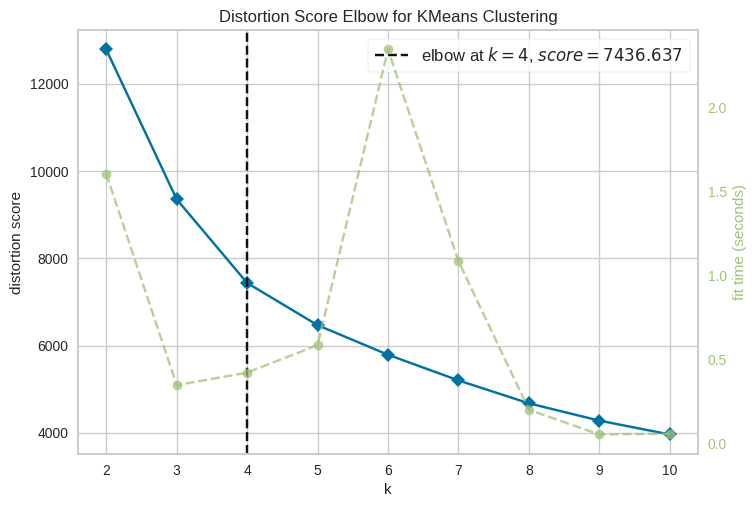

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42)
# Fit model and predict clusters
cluster_labels = kmeans.fit_predict(PCA_ds)  # Changed variable name from yhat_kmeans to cluster_labels
PCA_ds["Clusters"] = cluster_labels
# Adding the Clusters feature to the original dataframe.
data_cleaned["Clusters"] = cluster_labels
scaled_ds["Clusters"] = cluster_labels

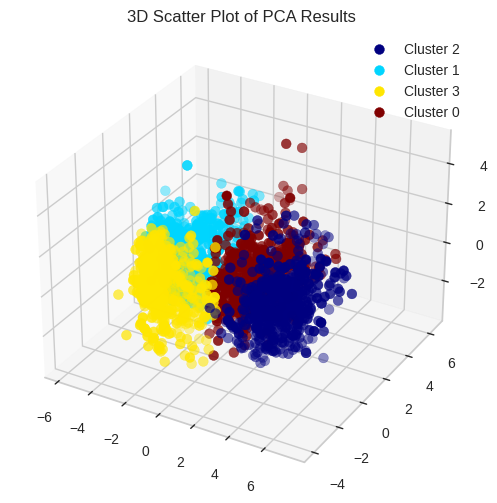

In [28]:
# Create a new figure for the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract columns for the plot
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

# Get unique clusters
clusters = PCA_ds['Clusters'].unique()

# Color map for clusters
colors = plt.cm.jet(np.linspace(0, 1, len(clusters)))

# Plot each cluster
for cluster, color in zip(clusters, colors):
    ix = PCA_ds['Clusters'] == cluster
    ax.scatter(x[ix], y[ix], z[ix], c=[color], label=f'Cluster {cluster}', s=50)

ax.set_title('3D Scatter Plot of PCA Results')
ax.legend()
plt.show()

### Evaluating the Model

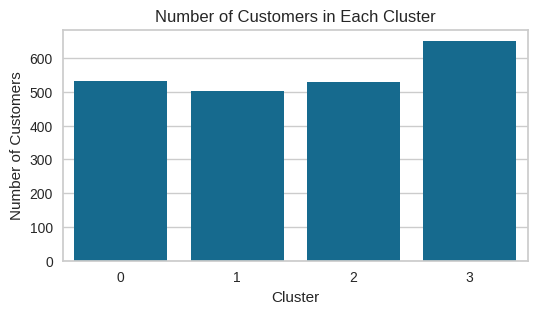

In [29]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Clusters', data=data_cleaned)
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

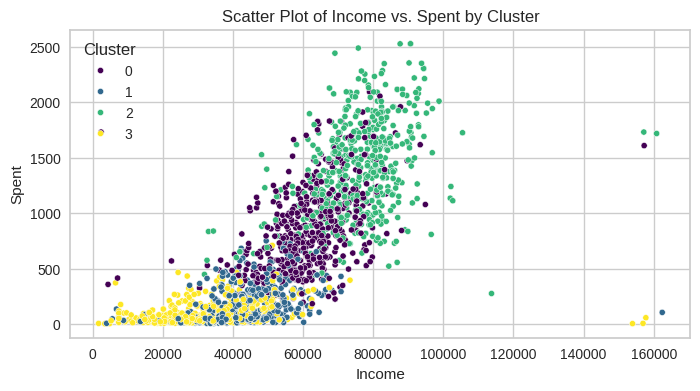

In [30]:
#scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Income', y='Spent', hue='Clusters', data=data_cleaned, palette='viridis', s=20)

plt.title('Scatter Plot of Income vs. Spent by Cluster')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend(title='Cluster')
plt.show()

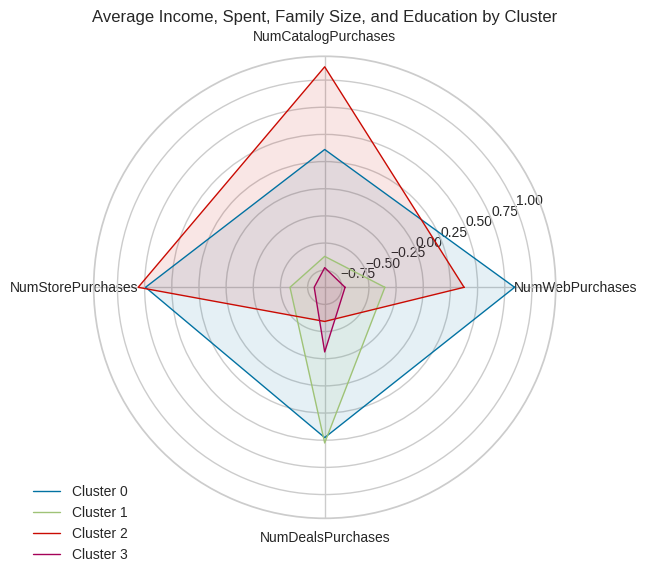

In [31]:
from math import pi
attributes = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
cluster_means = scaled_ds.groupby('Clusters')[attributes].mean().reset_index()

# Number of variables we're plotting.
num_vars = len(attributes)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Labels for each attribute.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Add legend and title
plt.title('Average Income, Spent, Family Size, and Education by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

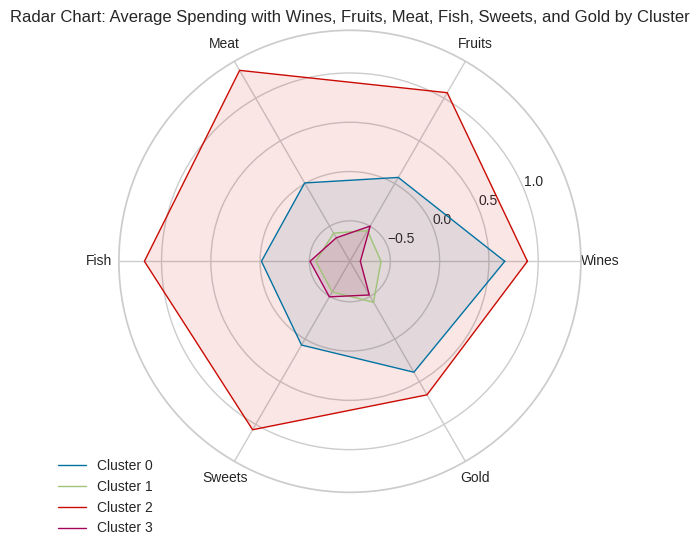

In [32]:
# Group by 'Clusters' and calculate the mean for ...
attributes = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
cluster_means = scaled_ds.groupby('Clusters')[attributes].mean().reset_index()

# Number of variables we're plotting.
num_vars = len(attributes)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Labels for each attribute.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Add legend and title
plt.title('Radar Chart: Average Spending with Wines, Fruits, Meat, Fish, Sweets, and Gold by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

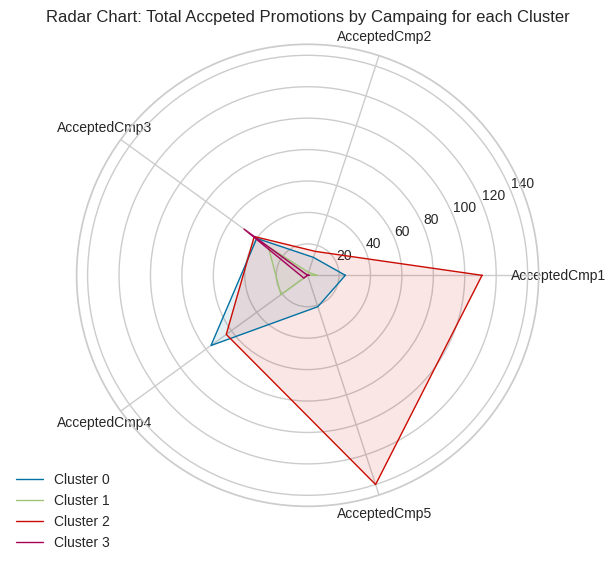

In [33]:
# Group by 'Clusters' and calculate the mean for ...
attributes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cluster_means = data_cleaned.groupby('Clusters')[attributes].sum().reset_index()

# Number of variables we're plotting.
num_vars = len(attributes)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Labels for each attribute.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Add legend and title
plt.title('Radar Chart: Total Accpeted Promotions by Campaing for each Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

### Conclusion
In this project, we have meticulously analyzed a Customer Dataset through the creation of customer segmentation. Our workflow encompassed data cleaning, extensive feature engineering, outlier management, and exploratory data analysis enhanced by visualizations. We then proceeded with data preprocessing, which included label encoding for categorical features, scaling of all features, and dimensionality reduction via PCA.

During the Machine Learning phase, we utilized the Elbow method to determine the optimal number of clusters (K) for the KMeans algorithm. After fitting the model, we conducted a thorough analysis of the resulting customer segments to extract distinct profiles for each cluster, revealing insightful patterns in consumer behavior.

Insights on Cluster Profiles: Cluster 0:

Exhibits high to average income and spending. Typically consists of families with 3 to 4 members. Represents the oldest age demographic. Shows significant expenditure on wines and gold. Purchases are well-distributed across catalog, store, and web channels. Predominantly responds to campaign 4. Cluster 1:

Characterized by low income and spending. Contains the largest families, with 4 to 5 members. Generally older in age. Purchases primarily through deals. Shows a low rate of campaign acceptance, with campaign 3 being the most accepted. Cluster 2:

Features the highest income and spending. Primarily consists of singles. Age range predominantly between 40 and 50 years. Favors purchases from catalogs. Shows a high acceptance rate for campaigns 1 and 5. Cluster 3:

Noted for the lowest income and spending. Comprises families of 2 or 3 members. Includes the youngest demographic. Mostly undergraduate or graduate education levels. Frequently purchases through deals. Exhibits the lowest campaign acceptance, with campaign 3 being notably accepted. Future Recommendations To enhance the robustness and applicability of our findings, future work could explore the integration of additional predictive modeling techniques and the application of advanced algorithms for dynamic segmentation. Employing time series analysis to track changes in customer behavior over time could provide deeper insights into trends and lifecycle patterns. Additionally, conducting A/B testing on selected campaigns within identified segments may offer concrete data on the effectiveness of targeted marketing strategies, thereby maximizing customer engagement and optimizing marketing spend.